In [27]:
# Deep Q-learning

In [1]:
%matplotlib inline
from __future__ import print_function
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#sns.set_context("notebook", font_scale=1.5)
import tqdm

In [2]:
# -*- coding: utf-8 -*-

import copy

import pickle
import numpy as np
import scipy.misc as spm

from chainer import cuda, FunctionSet, Variable, optimizers
import chainer.functions as F
import chainer

In [3]:
def norma(seq):
    return np.array(map(lambda (x,y): (y-x)/float(y) if x<=y else -(x-y)/float(x), zip(seq[:-1],seq[1:])))

def norm_and_center(x,scale=1):
    c2 = norma(x)
    c = 2*(c2 - c2.min())/(c2.max() - c2.min()) - 1
    return np.array(c).astype(np.float32)

def center(a):
    c = np.array(a)
    return 2*(c - c.min())/float(c.max() - c.min()) - 1

In [220]:
print("ok")

ok


---

---

---

---

---

# R34L  

---

---

---

---

---

In [4]:
nintendo = pd.read_csv("./local/ntdoy4.csv")

In [8]:
!head -n 10 local/DAT_ASCII_EURUSD_M1_2015.csv

20150101 130000;1.209650;1.209770;1.209620;1.209620;0
20150101 130100;1.209630;1.209680;1.209620;1.209620;0
20150101 130200;1.209650;1.209700;1.209610;1.209610;0
20150101 130400;1.209590;1.210080;1.209590;1.209830;0
20150101 130500;1.209880;1.209880;1.209880;1.209880;0
20150101 130600;1.209840;1.209840;1.209820;1.209820;0
20150101 130700;1.209860;1.209990;1.209860;1.209870;0
20150101 130800;1.209980;1.210220;1.209870;1.210080;0
20150101 130900;1.209960;1.209960;1.209960;1.209960;0
20150101 131000;1.210130;1.210190;1.209670;1.209770;0


In [807]:
eurusd = pd.read_csv("./local/DAT_ASCII_EURUSD_M1_2015.csv",sep=";",index_col=0)

In [808]:
eurusd = pd.read_csv("./local/DAT_ASCII_EURUSD_M1_2015.csv", #"./local/test.csv",
                     sep=";",
                     index_col=0,
                     parse_dates=0,
                     header=None,
                    usecols=[0,1,2,3,4],
                    names=["date","open","high","low","close"])

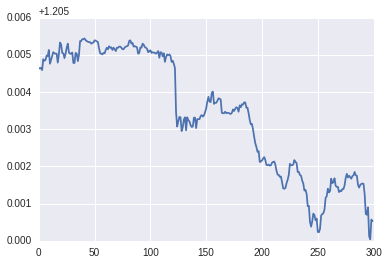

In [809]:
plt.plot(eurusd[:300]["open"])
plt.show()

In [ ]:
print("ok")

In [5]:
import requests
import os

In [45]:
tickers_file = pd.read_csv("local/companylist.csv")

In [49]:
tickers_file["Symbol"].values

array(['TFSC', 'TFSCR', 'TFSCU', ..., 'ZUMZ', 'ZYNE', 'ZNGA'], dtype=object)

In [53]:
%%time
tickers = tickers_file["Symbol"].values

# path is where I save downloaded tickers
path = 'local/tickers/'
# Yahoo API URL
url = "http://ichart.finance.yahoo.com/table.csv"
# Yahoo get parameters where date range 2011/01/01 - 2012/01/01
# although 2012/01/01 is an international holiday and won't be in the data
get_params = "s=%(t)s&a=00&b=01&c=2014&d=00&e=01&f=2015&g=d&ignore=.csv"
url = '?'.join([url, get_params])
for t in tickers:
    r = requests.get(url % {'t': t})
    if r.status_code != 200:
        continue
    fname = os.path.join(path, '%(t)s.csv' % {'t': t})
    with open(fname, 'w') as f:
        f.write(r.text)

CPU times: user 5.86 s, sys: 1.72 s, total: 7.59 s
Wall time: 3min 33s


In [55]:
import glob
from collections import Counter


c = Counter()
for fname in glob.glob(os.path.join(path, '*.csv')):
    fpath = fname
    with open(fpath) as f:
        c.update({len(f.readlines()): 1})

In [58]:
for fname in glob.glob(os.path.join(path, '*.csv')):
    fpath = fname
    with open(fpath) as f:
        if len(f.readlines()) == 253:
            continue
    os.remove(fpath)

In [60]:
!ls local/tickers/

AAL.csv		    DFVS.csv		JKHY.csv   RCMT.csv
AAME.csv	    DGAS.csv		JKI.csv    RCON.csv
AAOI.csv	    DGICA.csv		JMBA.csv   RDCM.csv
AAON.csv	    DGICB.csv		JNP.csv    RDEN.csv
AAPL.csv	    DGII.csv		JOBS.csv   RDHL.csv
AAWW.csv	    DGLD.csv		JOUT.csv   RDI.csv
AAXJ.csv	    DGLY.csv		JRJC.csv   RDNT.csv
ABAC.csv	    DGRE.csv		JSM.csv    RDWR.csv
ABAX.csv	    DGRS.csv		JST.csv    RECN.csv
ABCB.csv	    DGRW.csv		JTPY.csv   REDF.csv
ABCD.csv	    DHIL.csv		JVA.csv    REFR.csv
ABCO.csv	    DHRM.csv		JXSB.csv   REGI.csv
ABEO.csv	    DIOD.csv		KALU.csv   REGN.csv
ABGB.csv	    DISCA.csv		KBAL.csv   REIS.csv
ABIO.csv	    DISCB.csv		KBSF.csv   RELL.csv
ABMD.csv	    DISCK.csv		KCAP.csv   RELV.csv
ABTL.csv	    DISH.csv		KELYA.csv  REXI.csv
ABUS.csv	    DJCO.csv		KELYB.csv  REXX.csv
ACAD.csv	    DLBL.csv		KEQU.csv   RFIL.csv
ACAS.csv	    DLBS.csv		KERX.csv   RGCO.csv
ACAT.csv	    DLHC.csv		KEYW.csv   RGEN.csv
ACET.csv	    DLTR.csv		KFFB.csv   RGLD.csv
ACFC.csv	    DMLP.csv		KFRC.csv   RGLS.csv
ACGL.cs

In [810]:
import pandas as pd
import numpy as np
from random import randint
from glob import glob
import os
import math
import operator

path = 'local/tickers/*.csv'
s = dict()
dataframes = dict()
for fpath in glob(path):
    ticker, _ = os.path.splitext(os.path.basename(fpath))
    #df = pd.DataFrame.from_csv(path, parse_dates=False)
    df = pd.read_table(fpath, sep=',')
    df.sort(columns=['Date'], inplace=True)
    df.index = df.index.order()
    df['Cumlative'] = df['Adj Close'] / df['Adj Close'][0]
    daily = df['Adj Close'][1:].values / df['Adj Close'][:-1].values - 1
    s[ticker] = math.sqrt(250) * np.average(daily) / np.std(daily)
    dataframes[ticker] = df

sharpes = list(reversed(sorted(s.iteritems(), key=operator.itemgetter(1))))

In [6]:
import datetime
import numpy as np
import pandas as pd
import urllib2


def get_historic_data(ticker,
                      start_date=(2000,1,1),
                      end_date=datetime.date.today().timetuple()[0:3]):
    """
    Obtains data from Yahoo Finance and adds it to a pandas DataFrame object.

    ticker: Yahoo Finance ticker symbol, e.g. "GOOG" for Google, Inc.
    start_date: Start date in (YYYY, M, D) format
    end_date: End date in (YYYY, M, D) format
    """

    # Construct the Yahoo URL with the correct integer query parameters
    # for start and end dates. Note that some parameters are zero-based!
    yahoo_url = "http://ichart.finance.yahoo.com/table.csv?s=%s&a=%s&b=%s&c=%s&d=%s&e=%s&f=%s" % \
        (ticker, start_date[1] - 1, start_date[2], start_date[0], end_date[1] - 1, end_date[2], end_date[0])
    
    # Try connecting to Yahoo Finance and obtaining the data
    # On failure, print an error message
    try:
        yf_data = urllib2.urlopen(yahoo_url).readlines()
    except Exception, e:
        print("Could not download Yahoo data: %s" % e)

    # Create the (temporary) Python data structures to store
    # the historical data
    date_list = []
    hist_data = [[] for i in range(6)]

    # Format and copy the raw text data into datetime objects
    # and floating point values (still in native Python lists)
    for day in yf_data[1:]:  # Avoid the header line in the CSV
        headers = day.rstrip().split(',')
        date_list.append(datetime.datetime.strptime(headers[0],'%Y-%m-%d'))
        for i, header in enumerate(headers[1:]):
            hist_data[i].append(float(header))

    # Create a Python dictionary of the lists and then use that to
    # form a sorted Pandas DataFrame of the historical data
    hist_data = dict(zip(['open', 'high', 'low', 'close', 'volume', 'adj_close'], hist_data))
    pdf = pd.DataFrame(hist_data, index=pd.Index(date_list)).sort()

    return pdf

def annualised_sharpe(returns, N=252):
    """
    Calculate the annualised Sharpe ratio of a returns stream 
    based on a number of trading periods, N. N defaults to 252,
    which then assumes a stream of daily returns.

    The function assumes that the returns are the excess of 
    those compared to a benchmark.
    """
    return np.sqrt(N) * returns.mean() / returns.std()

def equity_sharpe(ticker):
    """
    Calculates the annualised Sharpe ratio based on the daily
    returns of an equity ticker symbol listed in Yahoo Finance.

    The dates have been hardcoded here for the QuantStart article 
    on Sharpe ratios.
    """

    # Obtain the equities daily historic data for the desired time period
    # and add to a pandas DataFrame
    pdf = get_historic_data(ticker, start_date=(2000,1,1), end_date=(2013,5,29))

    # Use the percentage change method to easily calculate daily returns
    pdf['daily_ret'] = pdf['adj_close'].pct_change()

    # Assume an average annual risk-free rate over the period of 5%
    pdf['excess_daily_ret'] = pdf['daily_ret'] - 0.05/252

    # Return the annualised Sharpe ratio based on the excess daily returns
    return annualised_sharpe(pdf['excess_daily_ret'])

def market_neutral_sharpe(ticker, benchmark):
    """
    Calculates the annualised Sharpe ratio of a market
    neutral long/short strategy inolving the long of 'ticker'
    with a corresponding short of the 'benchmark'.
    """

    # Get historic data for both a symbol/ticker and a benchmark ticker
    # The dates have been hardcoded, but you can modify them as you see fit!
    tick = get_historic_data(ticker, start_date=(2000,1,1), end_date=(2013,5,29))
    bench = get_historic_data(benchmark, start_date=(2000,1,1), end_date=(2013,5,29))
    
    # Calculate the percentage returns on each of the time series
    tick['daily_ret'] = tick['adj_close'].pct_change()
    bench['daily_ret'] = bench['adj_close'].pct_change()
    
    # Create a new DataFrame to store the strategy information
    # The net returns are (long - short)/2, since there is twice 
    # trading capital for this strategy
    strat = pd.DataFrame(index=tick.index)
    strat['net_ret'] = (tick['daily_ret'] - bench['daily_ret'])/2.0
    
    # Return the annualised Sharpe ratio for this strategy
    return annualised_sharpe(strat['net_ret'])

In [7]:
#get_historic_data("GOOG", start_date=(2012,1,1))
#equity_sharpe('GOOG')
market_neutral_sharpe('GOOG','SPY')

0.75613590571282552

In [840]:
#get_historic_data("GOOG", start_date=(2012,1,1))

In [8]:
from scipy import optimize

In [9]:
def func(x):
    return - ( x[0]*1.23 + x[1] + x[2] )
def con(t):
    return t[0] + t[1] + t[2] - 1
cons = [{'type':'eq', 'fun': con},]

In [10]:
optimize.minimize(func, [0.,0.,0.], constraints=cons,bounds=((0,1), (0,1), (0,1)))

  status: 0
 success: True
    njev: 4
    nfev: 20
     fun: -1.2300000000000002
       x: array([  1.00000000e+00,   1.94289029e-16,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
     jac: array([-1.23, -1.  , -1.  ,  0.  ])
     nit: 4

In [11]:
_data = nintendo["Open"].values[::-1].astype(np.float32)
#_data = get_historic_data("GOOG", start_date=(2012,1,1))["open"].values.astype(np.float32)
len(_data)

803

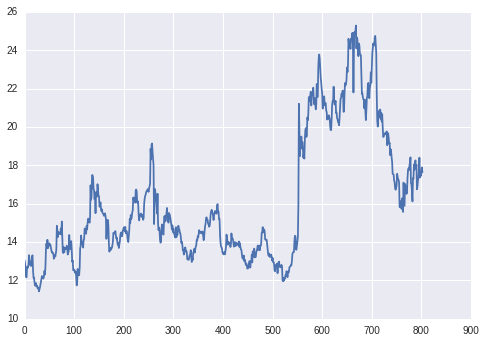

In [12]:
plt.plot(_data)
plt.show()

In [10]:
data = np.cumsum(np.random.uniform(-0.27, 0.3, 100))
len_clue = 20

for i in range(3):
    v = 10 #np.random.randint(5,15)
    data = np.append(data,np.zeros(len_clue))
    data = np.append(data,np.cumsum(np.random.uniform(-0.22, 0.2, 100)) + v )
    data = np.append(data,np.zeros(len_clue)+10)
    data = np.append(data,np.cumsum(np.random.uniform(-0.27, 0.3, 100)))
data = data.astype(np.float32)

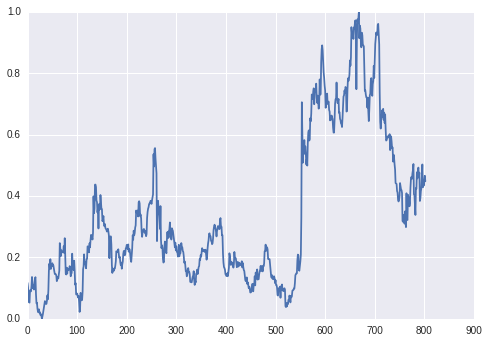

In [46]:
def center(c):
    return (c - np.min(c))/float(np.max(c) - np.min(c))
_data = nintendo["Open"].values[::-1].astype(np.float32)
#_data = get_historic_data("GOOG", start_date=(2012,1,1))["open"].values.astype(np.float32)
data = center(_data)
plt.plot(center(data))
plt.show()

In [219]:
data = data + 1

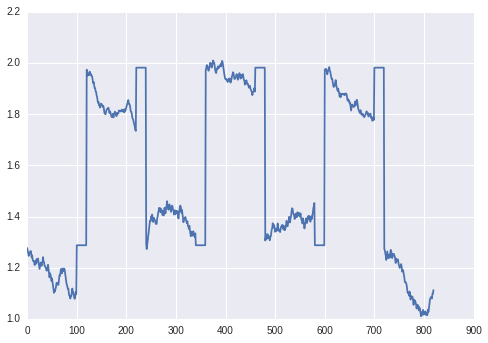

In [220]:
plt.plot(data)
plt.show()

In [14]:
state_window = 40
temporal_frames = 1
dim_2 = 1
dim_1 = state_window + 2

class DQN_class:
    # Hyper-Parameters
    gamma = 0.99  # Discount factor
    initial_exploration = 100#10**4  # Initial exploratoin. original: 5x10^4
    replay_size = 32  # Replay (batch) size
    target_model_update_freq = 10**4  # Target update frequancy. original: 10^4
    data_size = 10**5  # Data size of history. original: 10^6

    def __init__(self, enable_controller=[0, 3, 4]):
        self.train = True
        self.num_of_actions = len(enable_controller)
        self.enable_controller = enable_controller  # Default setting : "Pong"

        print("Initializing DQN...")
#	Initialization of Chainer 1.1.0 or older.
#        print "CUDA init"
#        cuda.init()

        ## Add initial weight to zeros everywhere? -> Nop, not learning anything
        ## Initial wright of reduced Gaussian sample? -> 
        mu, sigma = 0, np.sqrt(1/200.0)*10
        ##
        print("Model Building")
        self.model = FunctionSet(
            #l1=F.Convolution2D(4, 32, ksize=8, stride=4, nobias=False, wscale=np.sqrt(2)),
            #l2=F.Convolution2D(32, 64, ksize=4, stride=2, nobias=False, wscale=np.sqrt(2)),
            #l3=F.Convolution2D(64, 64, ksize=3, stride=1, nobias=False, wscale=np.sqrt(2)),
            ## Add initial weight to zeros?
            l1=F.Linear(dim_1, 200, initialW=np.random.normal(mu, np.sqrt(1/float(dim_1))*10, (200, dim_1)).astype(np.float32)),
            l4=F.Linear(200, 200, initialW=np.random.normal(mu, sigma*10, (200, 200)).astype(np.float32)),
            q_value=F.Linear(200, self.num_of_actions,
                             #initial_bias=np.random.uniform(-0.1, 0.1, nb_actions).astype(np.float32),
                             #initialW=np.random.uniform(-1, 1, (self.num_of_actions, 200)).astype(np.float32)
                             initialW=np.zeros((self.num_of_actions, 200),dtype=np.float32)
                            )
        ).to_gpu()

        self.model_target = copy.deepcopy(self.model)

        print(("Initizlizing Optimizer"))
        # lr=1e-4, alpha=0.95, momentum=0.9, eps=1e-4
        # lr=0.00025, alpha=0.95, momentum=0.95, eps=0.0001
        self.optimizer = optimizers.RMSpropGraves(lr=0.00025, alpha=0.95, momentum=0.95, eps=0.0001)
        self.optimizer.setup(self.model)
        self.optimizer.add_hook(chainer.optimizer.WeightDecay(0.0005)) ## effect? prev: 0.0005

        # History Data :  D=[s, a, r, s_dash, end_episode_flag]
        self.D = [np.zeros((self.data_size, temporal_frames, dim_1), dtype=np.uint8),
                  np.zeros(self.data_size, dtype=np.uint8),
                  np.zeros((self.data_size, 1), dtype=np.int8),
                  np.zeros((self.data_size, temporal_frames, dim_1), dtype=np.uint8),
                  np.zeros((self.data_size, 1), dtype=np.bool)]

    def forward(self, state, action, Reward, state_dash, episode_end):
        num_of_batch = state.shape[0]
        s = Variable(state)
        s_dash = Variable(state_dash)

        Q = self.Q_func(s)  # Get Q-value

        # Generate Target Signals
        tmp = self.Q_func_target(s_dash)  # Q(s',*)
        tmp = list(map(np.max, tmp.data.get()))  # max_a Q(s',a)
        max_Q_dash = np.asanyarray(tmp, dtype=np.float32)
        target = np.asanyarray(Q.data.get(), dtype=np.float32)

        for i in xrange(num_of_batch):
            if not episode_end[i][0]:
                tmp_ = np.sign(Reward[i]) + self.gamma * max_Q_dash[i]
                #print("FORWARDED HERE")
            else:
                tmp_ = np.sign(Reward[i])

            action_index = self.action_to_index(action[i])
            target[i, action_index] = tmp_

        # TD-error clipping
        td = Variable(cuda.to_gpu(target)) - Q  # TD error
        td_tmp = td.data + 1000.0 * (abs(td.data) <= 1)  # Avoid zero division
        td_clip = td * (abs(td.data) <= 1) + td/abs(td_tmp) * (abs(td.data) > 1)

        zero_val = Variable(cuda.to_gpu(np.zeros((self.replay_size, self.num_of_actions), dtype=np.float32)))
        loss = F.mean_squared_error(td_clip, zero_val)
        #print("FORWARDED AND THERE",loss.data)
        return loss, Q

    def stockExperience(self, time,
                        state, action, reward, state_dash,
                        episode_end_flag):
        data_index = time % self.data_size

        if episode_end_flag is True:
            self.D[0][data_index] = state
            self.D[1][data_index] = action
            self.D[2][data_index] = reward
        else:
            self.D[0][data_index] = state
            self.D[1][data_index] = action
            self.D[2][data_index] = reward
            self.D[3][data_index] = state_dash
        self.D[4][data_index] = episode_end_flag

    def experienceReplay(self, time):

        if self.initial_exploration < time:
            # Pick up replay_size number of samples from the Data
            if time < self.data_size:  # during the first sweep of the History Data
                replay_index = np.random.randint(0, time, (self.replay_size, 1))
            else:
                replay_index = np.random.randint(0, self.data_size, (self.replay_size, 1))

            s_replay = np.ndarray(shape=(self.replay_size, temporal_frames, dim_1), dtype=np.float32)
            a_replay = np.ndarray(shape=(self.replay_size, 1), dtype=np.uint8)
            r_replay = np.ndarray(shape=(self.replay_size, 1), dtype=np.float32)
            s_dash_replay = np.ndarray(shape=(self.replay_size, temporal_frames, dim_1), dtype=np.float32)
            episode_end_replay = np.ndarray(shape=(self.replay_size, 1), dtype=np.bool)
            for i in xrange(self.replay_size):
                s_replay[i] = np.asarray(self.D[0][replay_index[i]], dtype=np.float32)
                a_replay[i] = self.D[1][replay_index[i]]
                r_replay[i] = self.D[2][replay_index[i]]
                s_dash_replay[i] = np.array(self.D[3][replay_index[i]], dtype=np.float32)
                episode_end_replay[i] = self.D[4][replay_index[i]]

            s_replay = cuda.to_gpu(s_replay)
            s_dash_replay = cuda.to_gpu(s_dash_replay)

            # Gradient-based update
            self.optimizer.zero_grads()
            loss, _ = self.forward(s_replay, a_replay, r_replay, s_dash_replay, episode_end_replay)
            loss.backward()
            self.optimizer.update()

            #
            return loss.data

    def Q_func(self, state):
        # relu works better?
        h1 = F.tanh(self.model.l1(state)) # / 254.0))  # scale inputs in [0.0 1.0]
        #h2 = F.relu(self.model.l2(h1))
        #h3 = F.relu(self.model.l3(h2))
        h4 = F.dropout(F.tanh(self.model.l4(h1)),ratio=0.5,train=self.train)
        Q = self.model.q_value(h4)
        return Q

    def Q_func_target(self, state):
        h1 = F.tanh(self.model_target.l1(state)) # / 254.0))  # scale inputs in [0.0 1.0]
        #h2 = F.relu(self.model_target.l2(h1))
        #h3 = F.relu(self.model_target.l3(h2))
        h4 = F.dropout(F.tanh(self.model.l4(h1)),ratio=0.5,train=self.train)
        Q = self.model_target.q_value(h4)
        return Q

    def e_greedy(self, state, epsilon):
        s = Variable(state)
        Q = self.Q_func(s)
        Q = Q.data

        if np.random.rand() < epsilon:
            index_action = np.random.randint(0, self.num_of_actions)
            print("RANDOM")
        else:
            index_action = np.argmax(Q.get())
            print("GREEDY")
        return self.index_to_action(index_action), Q

    def target_model_update(self):
        self.model_target = copy.deepcopy(self.model)

    def index_to_action(self, index_of_action):
        return self.enable_controller[index_of_action]

    def action_to_index(self, action):
        return self.enable_controller.index(action)

In [96]:
dqn = DQN_class(enable_controller=range(0,3))


Initializing DQN...
Model Building
Initizlizing Optimizer


In [97]:
dqn.replay_size = 128


In [105]:
#%%time
possible_actions = [0,1,2]
epsilon = 0.5
epoch = 400
logs = []
grace = 100
initial_exploration = 100
log_loss = []
log_perf_min = []
# log_perf_max = []
# log_parameters=[]
# nb_actions = []

In [171]:
time=0
dqn.train=True
initial_capital = 100 + 10*data[state_window]
final_static_capital = 100 + 10*data[-1]

for ep in tqdm.tqdm(range(epoch)):   
    stock = np.random.randint(0,10) #10
    wallet = np.random.randint(0,200) #100.0
    #stock = 10
    #wallet = 100.0
    portfolio = 0
    
    for i in range(state_window, len(data)-1):
        is_empty_wallet = 0 if wallet<10 else 1 # 0 if empty
        is_empty_stock = min(stock,1)
        state = np.array([np.append(
                    data[i - state_window : i],
                    np.array([is_empty_stock,is_empty_wallet])
                    ).astype(np.float32)])
        #state = np.array([
        #            data[i - state_window : i]
        #            ]).astype(np.float32)

        old_wallet = wallet
        old_portfolio = portfolio


        if np.random.rand()<epsilon:
            action = np.random.choice(len(possible_actions))
        else:
            s = cuda.to_gpu(state)
            out = dqn.Q_func(Variable(s)).data
            action = out.argmax()
        
        is_terminal = i == len(data)-2
        #print(is_terminal)
        ###
        #if i%32!=0 and not(is_terminal):
        #    continue
        ###

        if action == 0:  # hold
            pass
        if action == 1:  # sell
            if is_empty_stock:
                stock -= 1
                wallet += data[i]
        if action == 2:  # buy
            if is_empty_wallet:
                stock += 1
                wallet -= data[i]

        portfolio = stock*data[i]
        
        #reward = np.zeros(3)
        #reward[action] = wallet - old_wallet
        diff = (old_wallet + old_portfolio) - (wallet + portfolio)
        
        #is_terminal = i == len(data)-2
        
        if is_terminal:
            if wallet + portfolio <= final_static_capital:
                reward = wallet + portfolio - final_static_capital 
            else: #wallet + portfolio > 1000:
                reward = wallet + portfolio - final_static_capital
        else:
            #"""
            reward = 0
            """
            if diff < 0:
                reward = -0.001
            elif diff > 0:
                reward = 0.005
            else:
                reward = 0
            """
        
        is_empty_wallet = 0 if wallet<10 else 1 # 0 if empty
        is_empty_stock = min(stock,1)
        new_state = np.array([np.append(
                    data[i - state_window : i],
                    np.array([is_empty_stock,is_empty_wallet])
                    ).astype(np.float32)])
        #new_state = np.array([
        #            data[i+1 - state_window : i+1]
        #            ]).astype(np.float32)
        
        #is_terminal = i == len(data)-2
        dqn.stockExperience(time,
                           state.astype(np.int8),
                           action,
                           [reward],
                           new_state.astype(np.int8),
                           is_terminal
                          )
        if not(is_terminal): ## ???
            if i%32!=0:
                continue
        loss = dqn.experienceReplay(time)
        time+=1
        
        log_loss.append(loss)
    #if ep%5==0 or  ep==epoch:
    amax,nba = get_local_perf_argmax()
    log_perf_max.append(amax)
    nb_actions.append(nba)
    log_parameters.append(copy.deepcopy(dqn.model.parameters))
    dqn.train=True
print("over")

over


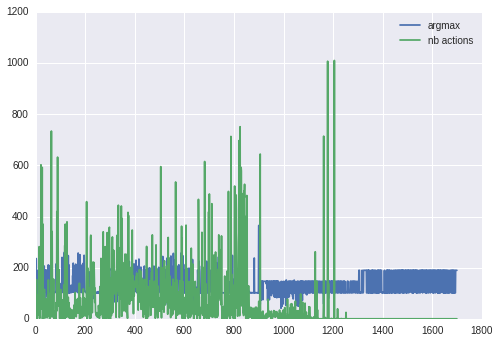

In [172]:
#plt.plot(log_perf_min,label="argmin")
plt.plot(log_perf_max,label="argmax")
plt.plot(nb_actions,label="nb actions")
plt.legend()
plt.show()

In [173]:
list_best = np.array(sorted(zip(log_perf_max,nb_actions,log_parameters) , key=lambda x: x[0], reverse=True))
list_best[:10,:2]

array([[364.72670227568597, 68],
       [364.72670227568597, 68],
       [364.72670227568597, 68],
       [275.37445322051644, 49],
       [263.67748392000794, 53],
       [259.07142323628068, 42],
       [258.18902776017785, 42],
       [257.37878370285034, 94],
       [257.10172662511468, 80],
       [255.82827844843268, 49]], dtype=object)

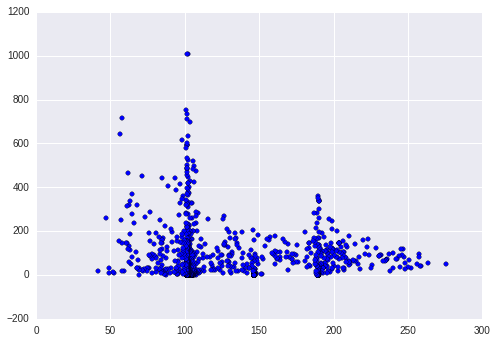

In [178]:
plt.scatter(x=list_best[:,0],y=list_best[:,1])
plt.show()

In [221]:
#!pip install plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

# takes ~3s
init_notebook_mode()

In [222]:
trace = go.Scattergl(
    x = list_best[:,0],
    y = list_best[:,1],
    mode = 'markers',
    marker = dict(
        color = list_best[:,0]
    )
)
"""
trace = go.Scattergl(
    x = list_best[ np.where(list_best[:,0] > 200) , 0][0],
    y = list_best[ np.where(list_best[:,0] > 200) , 1][0],
    mode = 'markers',
    marker = dict(
        color = list_best[:,0]
    )
)
trace = go.Scattergl(
    x = list_best[:,0],
    y = list_best[:,1],
    mode = 'markers',
    marker = dict(
        color = list_best[:,0]
    )
)
"""
iplot([trace])

In [175]:
list_best[:10,:2]

array([[364.72670227568597, 68],
       [364.72670227568597, 68],
       [364.72670227568597, 68],
       [275.37445322051644, 49],
       [263.67748392000794, 53],
       [259.07142323628068, 42],
       [258.18902776017785, 42],
       [257.37878370285034, 94],
       [257.10172662511468, 80],
       [255.82827844843268, 49]], dtype=object)

In [176]:
#dqn.model.parameters = list_best[0,2]

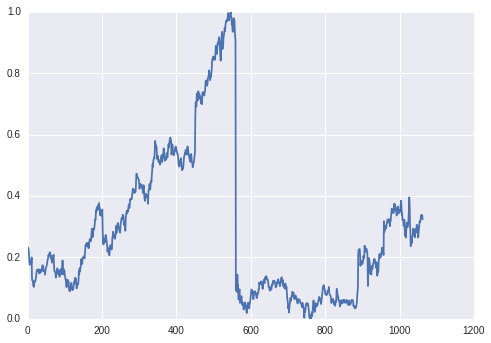

In [227]:
# MSFT, CSCO, YHOO, INTC, NVDA, SIRI, FB, VA
# BIS, TVIX, DSLV, ZBIO
#_data = nintendo["Open"].values[::-1].astype(np.float32)
_data = get_historic_data("GOOG", start_date=(2012,1,1))["open"].values.astype(np.float32)
data = center(_data)
plt.plot(data)
plt.show()

Passive: init 101.742933393 final 103.241928518
Model perf: 298.193436095
Wallet 141.660915086
Nb stocks 472


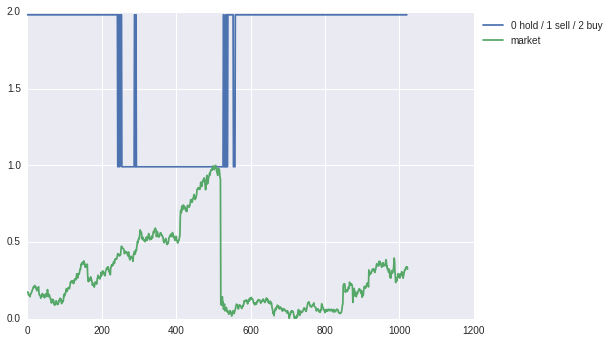

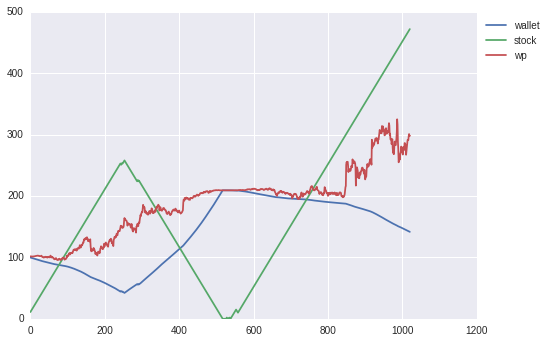

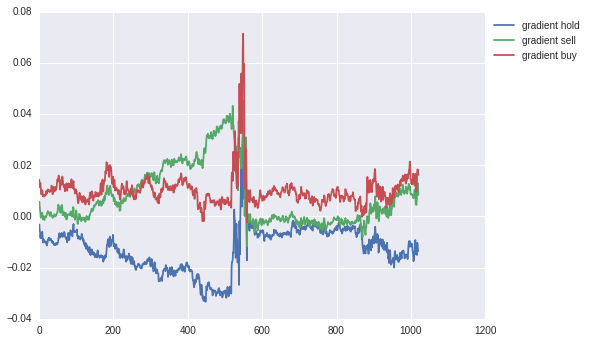

In [228]:
insights(wallet = 100,stock = 10)

Passive: init 101.089510322 final 103.921678364
Model perf: 250.766711686
Wallet 250.438739662
Nb stocks 1


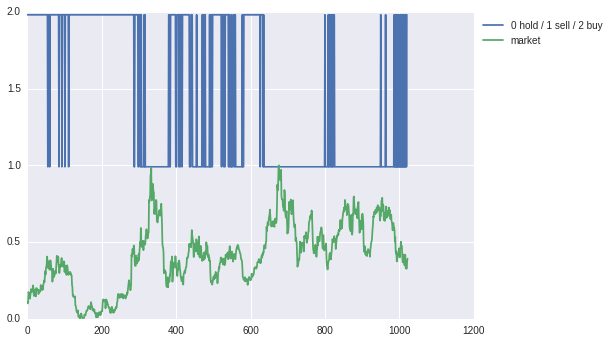

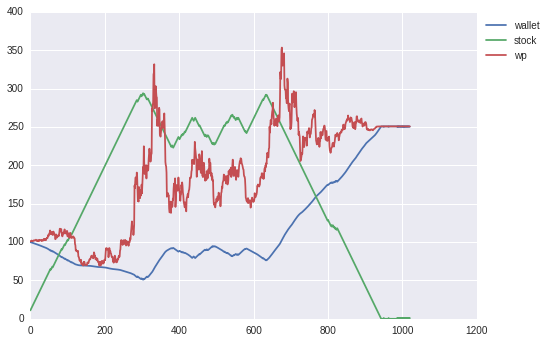

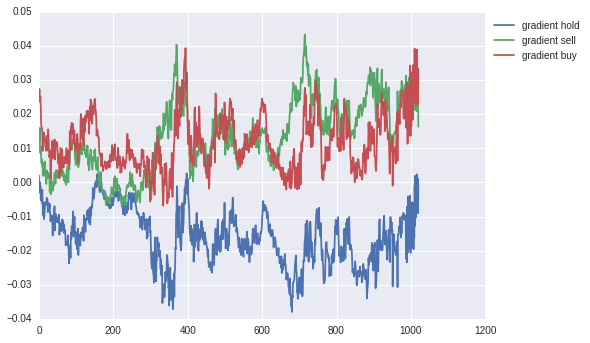

In [208]:
insights()

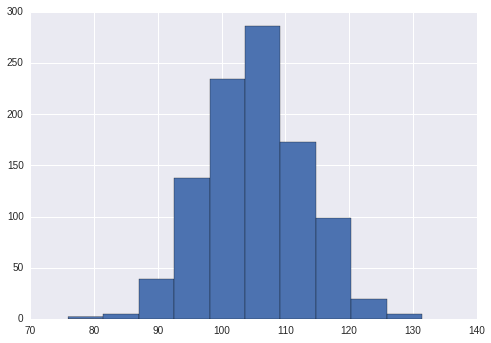

In [210]:
## Random money, reference

nb_monkeys = 1000
l = []
for m in range(nb_monkeys):
    wallet = 100
    stock = 10
    for i in range(state_window, len(data)-2):
        action = np.random.randint(0,3)   # monkey!
        if action == 0:  # hold
            pass
        if action == 1:  # sell
            stock -= 1
            wallet += data[i]
        if action == 2:  # buy
            stock += 1
            wallet -= data[i]
    l.append(wallet + stock*data[i])
plt.hist(l)
plt.show()

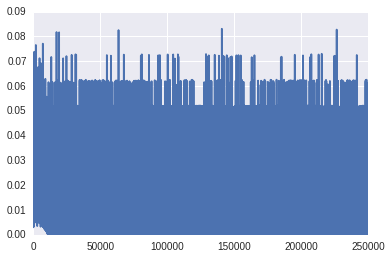

In [690]:
plt.plot(log_loss)
plt.show()

In [20]:
def insights(wallet = 100,stock = 10):
    log_actions = []
    log_stock = []
    log_wallet = []
    log_wp = []
    log_all_actions = []

    
    dqn.train=False

    initial_capital = wallet + stock*data[state_window]
    final_static_capital = wallet + stock*data[-1]

    for i in range(state_window, len(data)-2):
        is_empty_wallet = 0 if wallet<10 else 1 # 0 if empty
        is_empty_stock = min(stock,1)
        state = np.array([np.append(
                    data[i - state_window : i],
                    np.array([is_empty_stock,is_empty_wallet])
                    ).astype(np.float32)])
        #state = np.array([np.array(
        #            data[i - state_window : i]
        #            ).astype(np.float32)])
        s = cuda.to_gpu(state)
        out = cuda.to_cpu(dqn.Q_func(Variable(s)).data)
        action = out.argmax()
        # action = np.random.randint(0,3)   # monkey!

        if action == 0:  # hold
            pass
        if action == 1:  # sell
            if is_empty_stock:
                stock -= 1
                wallet += data[i]
        if action == 2:  # buy
            if is_empty_wallet:
                stock += 1
                wallet -= data[i]
        log_all_actions.append(out)
        log_actions.append(action)
        log_wallet.append(wallet)
        log_stock.append(stock)
        log_wp.append(wallet + stock*data[i])
    portfolio = stock*data[i]
    print("Passive: init",initial_capital,"final",final_static_capital)
    print("Model perf:",wallet + portfolio)
    print("Wallet",wallet)
    print("Nb stocks",stock)
    plt.plot(np.array(log_actions)*0.99+0.001,label="0 hold / 1 sell / 2 buy")
    plt.plot(data[state_window:],label="market")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()
    plt.plot(log_wallet,label="wallet")
    plt.plot(log_stock,label="stock")
    plt.plot(log_wp,label="wp")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

    logs = np.array(log_all_actions)
    plt.plot(logs[:,:,0],label="gradient hold")
    plt.plot(logs[:,:,1],label="gradient sell")
    plt.plot(logs[:,:,2],label="gradient buy")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

In [21]:
def get_local_perf_argmin(wallet = 100,stock = 10):
    dqn.train=False
    cpt_action_change = 0
    for i in range(state_window, len(data)-2):
        is_empty_wallet = 0 if wallet<10 else 1 # 0 if empty
        is_empty_stock = min(stock,1)
        state = np.array([np.append(
                    data[i - state_window : i],
                    np.array([is_empty_stock,is_empty_wallet])
                    ).astype(np.float32)])
        s = cuda.to_gpu(state)
        out = cuda.to_cpu(dqn.Q_func(Variable(s)).data)
        action = out.argmin()
        if action == 0:  # hold
            pass
        if action == 1:  # sell
            if is_empty_stock:
                stock -= 1
                wallet += data[i]
        if action == 2:  # buy
            if is_empty_wallet:
                stock += 1
                wallet -= data[i]
        if i==state_window:
            last_act = action
        else:
            if last_act != action:
                cpt_action_change += 1
                last_act = action
    return wallet + stock*data[i], cpt_action_change

def get_local_perf_argmax(wallet = 100,stock = 10):
    dqn.train=False
    cpt_action_change = 0
    for i in range(state_window, len(data)-2):
        is_empty_wallet = 0 if wallet<10 else 1 # 0 if empty
        is_empty_stock = min(stock,1)
        state = np.array([np.append(
                    data[i - state_window : i],
                    np.array([is_empty_stock,is_empty_wallet])
                    ).astype(np.float32)])
        s = cuda.to_gpu(state)
        out = cuda.to_cpu(dqn.Q_func(Variable(s)).data)
        action = out.argmax()
        if action == 0:  # hold
            pass
        if action == 1:  # sell
            if is_empty_stock:
                stock -= 1
                wallet += data[i]
        if action == 2:  # buy
            if is_empty_wallet:
                stock += 1
                wallet -= data[i]
        if i==state_window:
            last_act = action
        else:
            if last_act != action:
                cpt_action_change += 1
                last_act = action
    return wallet + stock*data[i], cpt_action_change

1181.06371342
1122.07901417
166


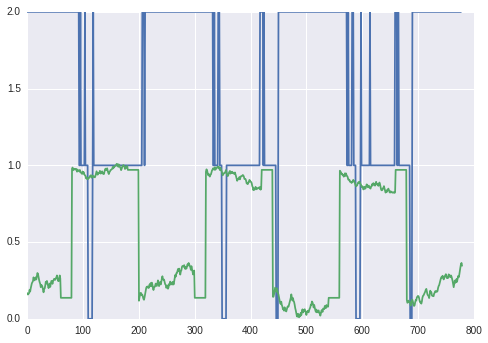

In [67]:
## at 100 epochs

log_actions = []

wallet = 1000
stock = 0

for i in range(state_window, len(data)-2):
    is_empty_wallet = 0 if wallet<10 else 1 # 0 if empty
    is_empty_stock = min(stock,1)
    state = np.array([np.append(
                data[i - state_window : i],
                np.array([is_empty_stock,is_empty_wallet])
                ).astype(np.float32)])
    s = cuda.to_gpu(state)
    out = cuda.to_cpu(dqn.Q_func(Variable(s)).data)
    action = out.argmax()
    # action = np.random.randint(0,3)   # monkey!

    if action == 0:  # hold
        pass
    if action == 1:  # sell
        stock -= 1
        wallet += data[i]
    if action == 2:  # buy
        stock += 1
        wallet -= data[i]
    log_actions.append(action)
portfolio = stock*data[i]
print(wallet + portfolio)
print(wallet)
print(stock)
plt.plot(log_actions)
plt.plot(data[state_window:])
plt.show()

1210.11982852
1204.44423022
58


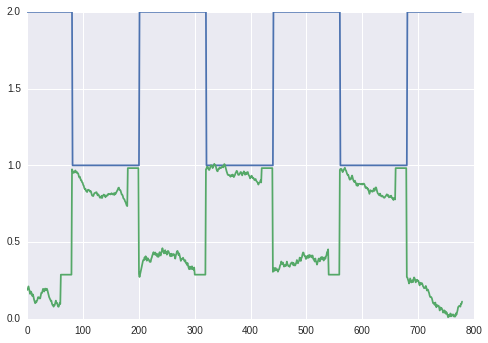

In [194]:
#
# optimum without constraints = 1275.95832723
#
log_actions = []

wallet = 1000
stock = 0
action = 2

for i in range(state_window, len(data)-2):

    if action == 0:  # hold
        pass
    if action == 1:  # sell
        stock -= 1
        wallet += data[i]
    if action == 2:  # buy
        stock += 1
        wallet -= data[i]
    log_actions.append(action)
    if i%120 == 0 and i!=0:
        action = 1 if action==2 else 2
portfolio = stock*data[i]
print(wallet + portfolio)
print(wallet)
print(stock)
plt.plot(log_actions)
plt.plot(data[state_window:])
plt.show()

In [107]:
i = np.random.choice(range(state_window, len(data)-2))
state = np.array([
                data[i - state_window : i]
                ]).astype(np.float32)
s = cuda.to_gpu(state)
out = dqn.Q_func(Variable(s)).data
action = out.argmax()
print(out, action)
i = np.random.choice(range(state_window, len(data)-2))
state = np.array([
                data[i - state_window : i]
                ]).astype(np.float32)
s = cuda.to_gpu(state)
out = dqn.Q_func(Variable(s)).data
action = out.argmax()
print(out, action)

[[ 0.02201563  0.01021586  0.00910323]] 0
[[-0.04119842 -0.03461212 -0.01386024]] 2


In [ ]:
plt.plot(log_actions)
plt.show()

In [44]:
def center(a):
    c = np.array(a)
    return 2*(c - c.min())/float(c.max() - c.min()) - 1

TypeError: Unsupported type <type 'numpy.ndarray'>

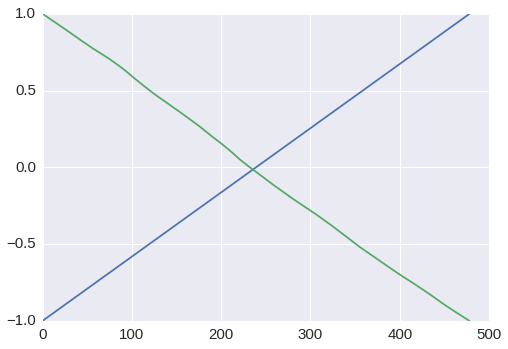

In [50]:
plt.plot(center(logs_stock))
plt.plot(center(logs_wallet))
plt.plot(center(logs_action))
plt.plot(center(data[state_window:]))
plt.show()

In [ ]:
#sns.set_style("darkgrid", {"axes.grid": False})
#sns.set_context("notebook", font_scale=1.5, rc={"axes.grid": False})
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(logs_action, 'g-')
ax2.plot(data, 'b-')

plt.show()

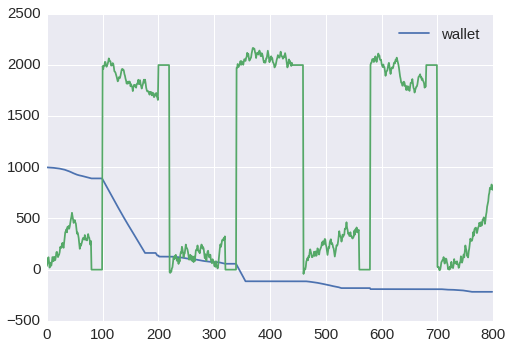

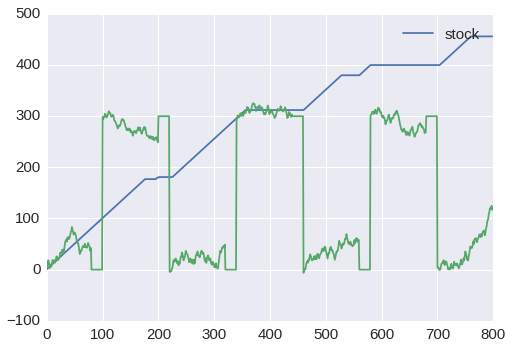

In [118]:
plt.plot(logs_wallet,label="wallet")
plt.plot(data[state_window:]*200)
plt.legend()
plt.show()

plt.plot(logs_stock,label="stock")
plt.plot(data[state_window:]*30)
plt.legend()
plt.show()

In [13]:
class dqn_agent(Agent):  # RL-glue Process
    lastAction = Action()
    policyFrozen = False

    def agent_init(self, taskSpec):
        # Some initializations for rlglue
        self.lastAction = Action()

        self.time = 0
        self.epsilon = 1.0  # Initial exploratoin rate

        # Pick a DQN from DQN_class
        self.DQN = DQN_class()  # default is for "Pong".

    def agent_start(self, observation):

        # Preprocess
        tmp = np.bitwise_and(np.asarray(observation.intArray[128:]).reshape([210, 160]), 0b0001111)  # Get Intensity from the observation
        obs_array = (spm.imresize(tmp, (110, 84)))[110-84-8:110-8, :]  # Scaling

        # Initialize State
        self.state = np.zeros((4, 84, 84), dtype=np.uint8)
        self.state[0] = obs_array
        state_ = cuda.to_gpu(np.asanyarray(self.state.reshape(1, 4, 84, 84), dtype=np.float32))

        # Generate an Action e-greedy
        returnAction = Action()
        action, Q_now = self.DQN.e_greedy(state_, self.epsilon)
        returnAction.intArray = [action]

        # Update for next step
        self.lastAction = copy.deepcopy(returnAction)
        self.last_state = self.state.copy()
        self.last_observation = obs_array

        return returnAction

    def agent_step(self, reward, observation):

        # Preproces
        tmp = np.bitwise_and(np.asarray(observation.intArray[128:]).reshape([210, 160]), 0b0001111)  # Get Intensity from the observation
        obs_array = (spm.imresize(tmp, (110, 84)))[110-84-8:110-8, :]  # Scaling
        obs_processed = np.maximum(obs_array, self.last_observation)  # Take maximum from two frames

        # Compose State : 4-step sequential observation
        self.state = np.asanyarray([self.state[1], self.state[2], self.state[3], obs_processed], dtype=np.uint8)
        state_ = cuda.to_gpu(np.asanyarray(self.state.reshape(1, 4, 84, 84), dtype=np.float32))

        # Exploration decays along the time sequence
        if self.policyFrozen is False:  # Learning ON/OFF
            if self.DQN.initial_exploration < self.time:
                self.epsilon -= 1.0/10**6
                if self.epsilon < 0.1:
                    self.epsilon = 0.1
                eps = self.epsilon
            else:  # Initial Exploation Phase
                print("Initial Exploration : %d/%d steps" % (self.time, self.DQN.initial_exploration))
                eps = 1.0
        else:  # Evaluation
                print("Policy is Frozen")
                eps = 0.05

        # Generate an Action by e-greedy action selection
        returnAction = Action()
        action, Q_now = self.DQN.e_greedy(state_, eps)
        returnAction.intArray = [action]

        # Learning Phase
        if self.policyFrozen is False:  # Learning ON/OFF
            self.DQN.stockExperience(self.time, self.last_state, self.lastAction.intArray[0], reward, self.state, False)
            self.DQN.experienceReplay(self.time)

        # Target model update
        if self.DQN.initial_exploration < self.time and np.mod(self.time, self.DQN.target_model_update_freq) == 0:
            print("########### MODEL UPDATED ######################")
            self.DQN.target_model_update()

        # Simple text based visualization
        print(' Time Step %d /   ACTION  %d  /   REWARD %.1f   / EPSILON  %.6f  /   Q_max  %3f' % (self.time, self.DQN.action_to_index(action), np.sign(reward), eps, np.max(Q_now.get())))

        # Updates for next step
        self.last_observation = obs_array

        if self.policyFrozen is False:
            self.lastAction = copy.deepcopy(returnAction)
            self.last_state = self.state.copy()
            self.time += 1

        return returnAction

    def agent_end(self, reward):  # Episode Terminated

        # Learning Phase
        if self.policyFrozen is False:  # Learning ON/OFF
            self.DQN.stockExperience(self.time, self.last_state, self.lastAction.intArray[0], reward, self.last_state, True)
            self.DQN.experienceReplay(self.time)

        # Target model update
        if self.DQN.initial_exploration < self.time and np.mod(self.time, self.DQN.target_model_update_freq) == 0:
            print("########### MODEL UPDATED ######################")
            self.DQN.target_model_update()

        # Simple text based visualization
        print('  REWARD %.1f   / EPSILON  %.5f' % (np.sign(reward), self.epsilon))

        # Time count
        if self.policyFrozen is False:
            self.time += 1

    def agent_cleanup(self):
        pass

    def agent_message(self, inMessage):
        if inMessage.startswith("freeze learning"):
            self.policyFrozen = True
            return "message understood, policy frozen"

        if inMessage.startswith("unfreeze learning"):
            self.policyFrozen = False
            return "message understood, policy unfrozen"

        if inMessage.startswith("save model"):
            with open('dqn_model.dat', 'w') as f:
                pickle.dump(self.DQN.model, f)
            return "message understood, model saved"

In [3]:
if __name__ == "__main__":
    AgentLoader.loadAgent(dqn_agent())

RL-Glue Python Agent Codec Version: 2.02 (Build 738)
	Connecting to 127.0.0.1 on port 4096...


KeyboardInterrupt: 

---

---

---

---

---

# 0LD

---

---

---

---

---